In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mw_data = pd.read_csv('C:/Users/michelj8/Documents/Gretl Datasets/mw_load.csv')

Y = mw_data['load']

In [8]:
def exp_smooth(Y,alpha):
    smooth = [Y[1]]
    for t in range(1, len(Y)):
        smooth.append( (1-alpha)*Y[t] + (alpha)* smooth[t-1])    
    return smooth

def objective(Y,alpha,penalty):
    data = pd.DataFrame({'Y':Y, 'est':exp_smooth(Y,alpha)})
    data['est'] = data['est'].shift(1)
    data = data.dropna()
    
    sum_squares = np.square(data['Y'] - data['est']).sum() + penalty*abs(alpha)
    return sum_squares

def minimal_alpha(Y, penalty):
    obj_df = pd.DataFrame(columns = ['alpha','value'])
    
    obj_df['alpha'] = np.linspace(0,1,100)
    obj_df['value'] = obj_df['alpha'].apply(lambda s: objective(Y,s,penalty))
    
    min_val = obj_df['value'].min()
    return obj_df.set_index('value').loc[min_val,'alpha']

In [12]:
minimal_alpha(Y.values ,0.0)

0.0

In [20]:
obj_df = pd.DataFrame(columns = ['alpha','value'])

obj_df['alpha'] = np.linspace(-1,1,50)
obj_df['value'] = obj_df['alpha'].apply(lambda s: objective(Y,s,0.0))

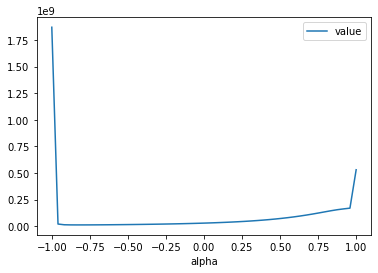

In [21]:
obj_df.plot(x='alpha',y='value')

In [22]:
obj_df

,alpha,value
0,-1.000000,1.870239e+09
1,-0.959184,1.982906e+07
2,-0.918367,1.303649e+07
3,-0.877551,1.181328e+07
4,-0.836735,1.153849e+07
5,-0.795918,1.158711e+07
6,-0.755102,1.179488e+07
7,-0.714286,1.210292e+07
8,-0.673469,1.248578e+07
9,-0.632653,1.293122e+07
